In [4]:
import datetime
from resnet18 import *
from utils import *
setup_seed(6666)


train_loader = load_data()
iter_val_loader = load_data(train=False, n_items=512)
epoch_val_loader, test_loader = load_data(train=False)

net = PlainNet().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

start_time = datetime.datetime.now()
for epoch in range(32):
    acc = train_model(epoch, (train_loader, iter_val_loader, epoch_val_loader), (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
print('Training time:%d' % (end_time - start_time).seconds)

0	0	loss: 2.307021141052246	lr: 0.10000
train acc: 0.10156	 validation acc: 0.09375
0	50	loss: 2.085308074951172	lr: 0.10000
train acc: 0.20312	 validation acc: 0.19922
0	100	loss: 1.900992751121521	lr: 0.10000
train acc: 0.30469	 validation acc: 0.27344
0	150	loss: 1.8155673742294312	lr: 0.10000
train acc: 0.24219	 validation acc: 0.30664
0	200	loss: 1.7223381996154785	lr: 0.10000
train acc: 0.33594	 validation acc: 0.37109
0	250	loss: 1.7894220352172852	lr: 0.10000
train acc: 0.34375	 validation acc: 0.41992
0	300	loss: 1.6484615802764893	lr: 0.10000
train acc: 0.38281	 validation acc: 0.36914
0	350	loss: 1.564327359199524	lr: 0.10000
train acc: 0.37500	 validation acc: 0.40430
epoch:   0	epoch acc: 0.4046875
1	0	loss: 1.5769891738891602	lr: 0.10000
train acc: 0.42188	 validation acc: 0.42383
1	50	loss: 1.6423282623291016	lr: 0.10000
train acc: 0.40625	 validation acc: 0.42188
1	100	loss: 1.565363883972168	lr: 0.10000
train acc: 0.37500	 validation acc: 0.39062
1	150	loss: 1.42375910

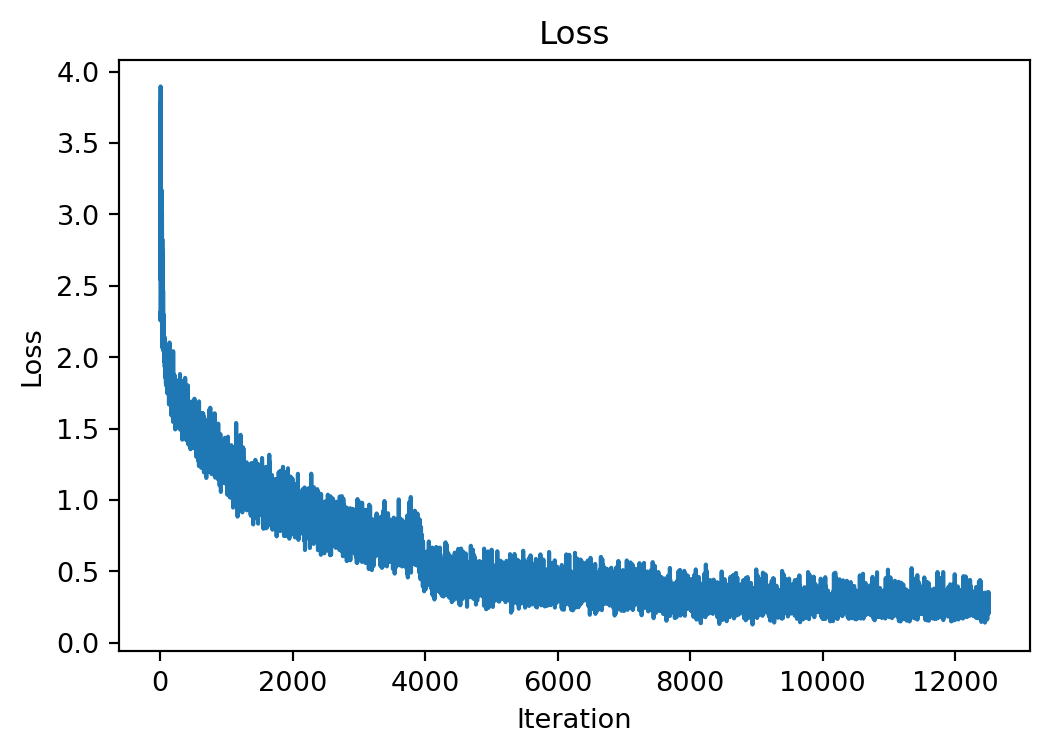

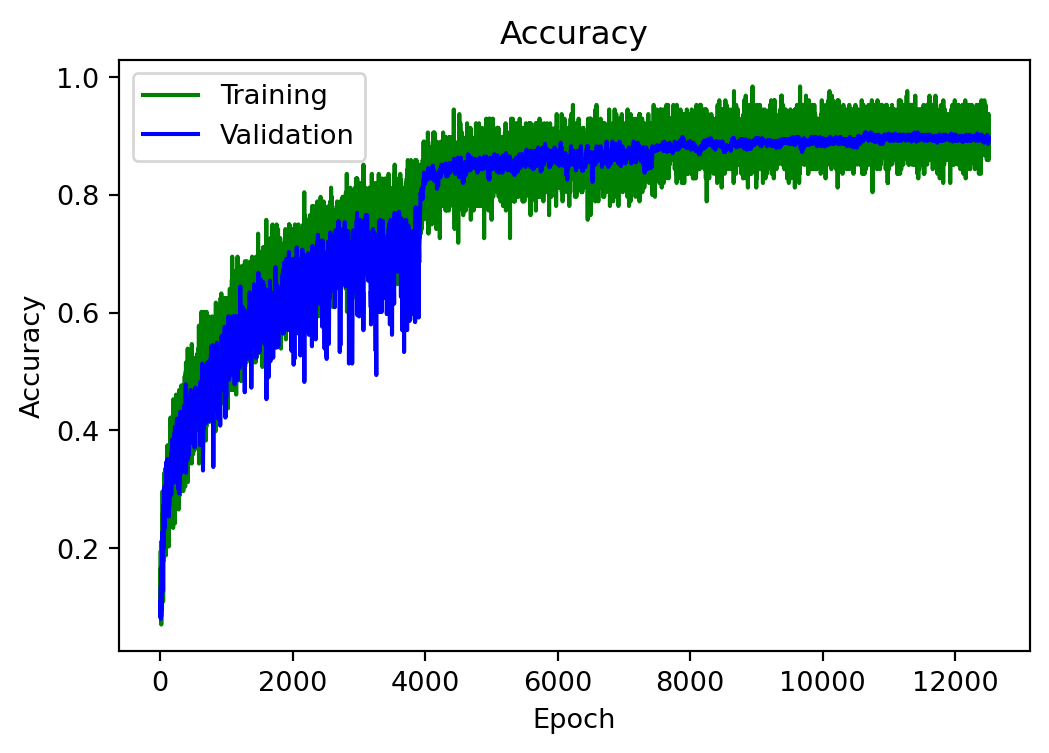

ILV: {'loss': 0.004216068874836502, 'train': 0.0018262610899337345, 'val': 0.0021712504088409277}
EFR: {'loss': 0.0580711392190775, 'train': 0.03041200538786957, 'val': 0.012983333930360877}


In [5]:
draw_loss(loss_list)
draw_acc(train_err, val_err)

loss_list = [i.item() for i in loss_list]
ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
print(f'ILV: {ILV}')
print(f'EFR: {EFR}')

In [5]:
torch.save(loss_list, './no-shortcut/loss_list')
torch.save(train_err, './no-shortcut/train_err')
torch.save(val_err, './no-shortcut/val_err')
torch.save(net.state_dict(), './no-shortcut/param.pth')

In [9]:
acc = get_val_acc(net, epoch_val_loader)
print(f"Test accuracy: {acc}")

Test accuracy: 0.10169270833333334
